In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
print([x for x in range(0,10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# Function that generates the vector of the input current value at each time step.
# The number of time steps is given by dividing the endtime of the simulation by tau.

def generate_input_vector(tau, endtime, list_intervals):
    num_steps = int(endtime / tau)
    v = np.zeros(num_steps)

    for start, end, value in list_intervals:
        start_v = int(start / tau)
        end_v = int(end / tau)

        if isinstance(value, (int, float)):
            v[start_v:end_v] = value

        elif callable(value): # Value is not an number but it is a function in term of t (each timestep)
            print(start_v, end_v)
            for i in range(start_v, end_v):
                t = i * tau
                v[i] = value(t)
    return v

In [4]:
def izhikevich_model(a, b, c, d, V_init, u_init, I_intervals, cut_spikes=True, tau=0.25, end_time=100, name='', e=5, f=140, u_update_variant=False):
    # Initialize vars
    V = V_init

    # Use default u initialization if u_init not defined
    if u_init == None:
        u = b*V
    else:
        u = u_init

    # Define time span
    t_span = np.arange(start=0, stop=end_time, step=tau)

    # Initialize histories
    V_history = []
    u_history = []
    I_history = []

    # Generate vector that indicates the I for each timestep
    I_steps = generate_input_vector(tau, end_time, I_intervals)

    # Euler method iteration
    for I in I_steps:
        
        V = V + tau * ((0.04 * (V**2)) + (e * V) + f - u + I)
        if u_update_variant:
            u = u + tau * a * (b * (V + 65))
        else:
            u = u + tau * a * ((b * V) - u)
        
        # Restart
        if V > 30:
            if cut_spikes:
                V_history.append(30)
            else:
                V_history.append(V)
            V = c
            u = u + d
        else:
            V_history.append(V)
        u_history.append(u)
        I_history.append(I)

    # Plots
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(t_span, V_history)
    ax1.plot(t_span, I_steps)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Membrane Potential')
    

    ax2.plot(V_history, u_history)
    ax2.set_xlabel('Membrane Potential Variable')
    ax2.set_ylabel('Recovery Variable')

    plt.title(name)
    fig.set_size_inches(18, 6)
    plt.show()

    # Save image to file
    fig.savefig('./neuron_models_imgs/' + name + '.png')

In [5]:
# For each neuron type we have an array of intervals
I_intervals_list = [
    # Intervals are in the form of (start, end, value)
    [(10, 100, 14)],
    [(20, 200, 0.5)],
    [(22, 220, 15)],
    [(20, 200, 0.6)],
    [(16, 160, 10)],
    
    [(8, 85, 30)],
    [(30, 300, lambda t : 0.075*(t-30))],
    [(0, 30, -0.5), (30, 300, lambda t: -0.5 + (0.015 * (t - 30)) )],
    [(10, 13, 7.04)],
    [(20, 25, 2)],

    [(40, 44, 0.65), (60, 64, 0.65), (280, 284, 0.65), (320, 324, 0.65)],
    [(9, 11, 9), (14, 16, 9), (70, 72, 9), (80, 82, 9)],
    [(20, 25, -15)],
    [(20, 25, -15)],
    [(10, 15, 1), (70, 75, -6), (80, 85, 1)],

    [(0, 37, 0.24), (37, 42, 1.24), (42, 216, 0.24), (216, 221, 1.24), (221, 300, 0.24) ],
    [(9, 11, 20)],
    [(0, 200, lambda t: t/25), (300, 313, lambda t: 4*(t-300)/12.5)],
    [(0, 50, 80), (50, 250, 75), (250, 350, 80)],
    [(0, 50, 80), (50, 250, 75), (250, 350, 80)],
]

In [6]:
params_list = [
    {'name':'(A) tonic spiking', 'a':0.02, 'b':0.2, 'c':-65, 'd':6, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.25, 'end_time':100, 'u_update_variant': False},
    {'name':'(B) phasic spiking', 'a':0.02, 'b':0.25, 'c':-65, 'd':6, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.25, 'end_time':200, 'u_update_variant': False},
    {'name':'(C) tonic bursting', 'a':0.02, 'b':0.2, 'c':-50, 'd':2, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.25, 'end_time':220, 'u_update_variant': False},
    {'name':'(D) phasic bursting', 'a':0.02, 'b':0.25, 'c':-55, 'd':0.05, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.2, 'end_time':200, 'u_update_variant': False},
    {'name':'(E) mixed mode', 'a':0.02, 'b':0.2, 'c':-55, 'd':4, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.25, 'end_time':160, 'u_update_variant': False},

    {'name':'(F) spike freq. adapt', 'a':0.01, 'b':0.2, 'c':-65, 'd':8, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.25, 'end_time':85, 'u_update_variant': False},
    {'name':'(G) Class 1 exc.', 'a':0.02, 'b':-0.1, 'c':-55, 'd':6, 'e':4.1, 'f':108, 'V_init':-60, 'u_init':None, 'tau':0.25, 'end_time':300, 'u_update_variant': False},
    {'name':'(H) Class 2 exc.', 'a':0.02, 'b':0.26, 'c':-65, 'd':0, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.25, 'end_time':300, 'u_update_variant': False},
    {'name':'(I) spike latency', 'a':0.02, 'b':0.2, 'c':-65, 'd':6, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.2, 'end_time':100, 'u_update_variant': False},
    {'name':'(J) subthresh. osc.', 'a':0.05, 'b':0.26, 'c':-60, 'd':0, 'e':5, 'f':140, 'V_init':-62, 'u_init':None, 'tau':0.25, 'end_time':200, 'u_update_variant': False},

    {'name':'(K) resonator', 'a':0.1, 'b':0.26, 'c':-60, 'd':-1, 'e':5, 'f':140, 'V_init':-62, 'u_init':None, 'tau':0.25, 'end_time':400, 'u_update_variant': False},
    {'name':'(L) integrator', 'a':0.02, 'b':-0.1, 'c':-55, 'd':6, 'e':4.1, 'f':108, 'V_init':-60, 'u_init':None, 'tau':0.25, 'end_time':100, 'u_update_variant': False},
    {'name':'(M) rebound spike', 'a':0.03, 'b':0.25, 'c':-60, 'd':4, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.2, 'end_time':200, 'u_update_variant': False},
    {'name':'(N) rebound burst', 'a':0.03, 'b':0.25, 'c':-52, 'd':0, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.2, 'end_time':200, 'u_update_variant': False},
    {'name':'(O) thresh. variability', 'a':0.03, 'b':0.25, 'c':-60, 'd':4, 'e':5, 'f':140, 'V_init':-64, 'u_init':None, 'tau':0.25, 'end_time':100, 'u_update_variant': False},

    {'name':'(P) bistability', 'a':0.1, 'b':0.26, 'c':-60, 'd':0, 'e':5, 'f':140, 'V_init':-61, 'u_init':None, 'tau':0.25, 'end_time':300, 'u_update_variant': False},
    {'name':'(Q) DAP', 'a':1, 'b':0.2, 'c':-60, 'd':-21, 'e':5, 'f':140, 'V_init':-70, 'u_init':None, 'tau':0.1, 'end_time':50, 'u_update_variant': False},
    {'name':'(R) accomodation', 'a':0.02, 'b':1, 'c':-55, 'd':4, 'e':5, 'f':140, 'V_init':-65, 'u_init':-16, 'tau':0.5, 'end_time':400, 'u_update_variant': True},
    {'name':'(S) inhibition induced spiking', 'a':-0.02, 'b':-1, 'c':-60, 'd':8, 'e':5, 'f':140, 'V_init':-63.8, 'u_init':None, 'tau':0.5, 'end_time':350, 'u_update_variant': False},
    {'name':'(T) inhibition induced bursting', 'a':-0.026, 'b':-1, 'c':-45, 'd':-2, 'e':5, 'f':140, 'V_init':-63.8, 'u_init':None, 'tau':0.5, 'end_time':350, 'u_update_variant': False},   

]

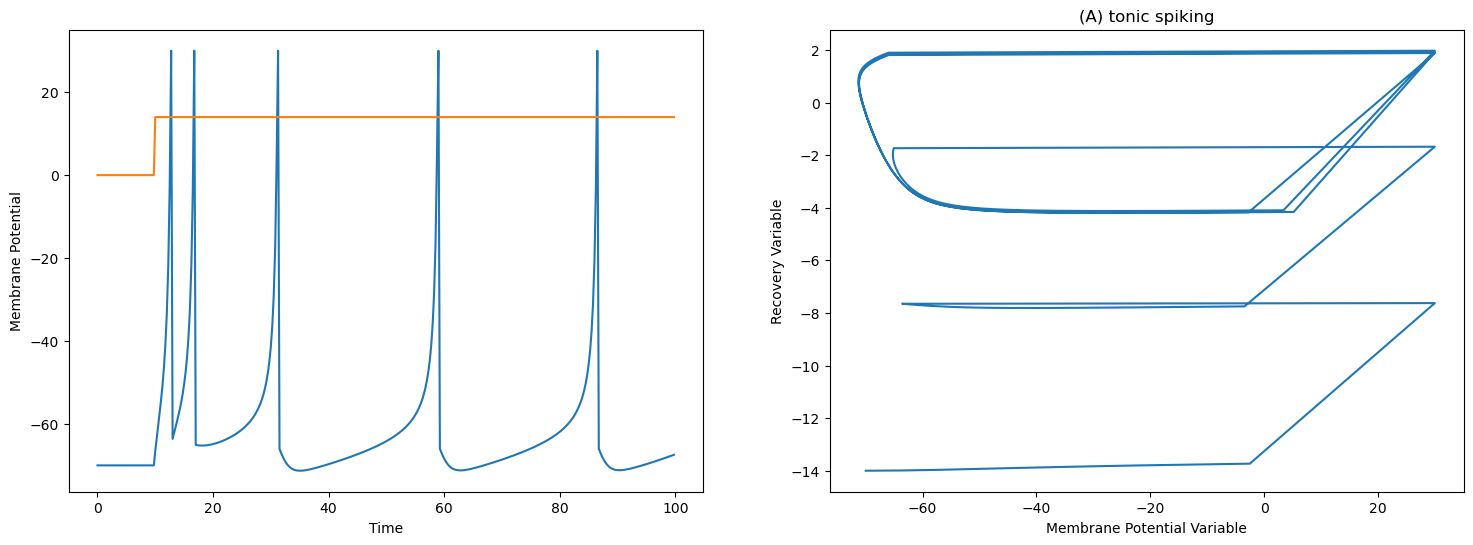

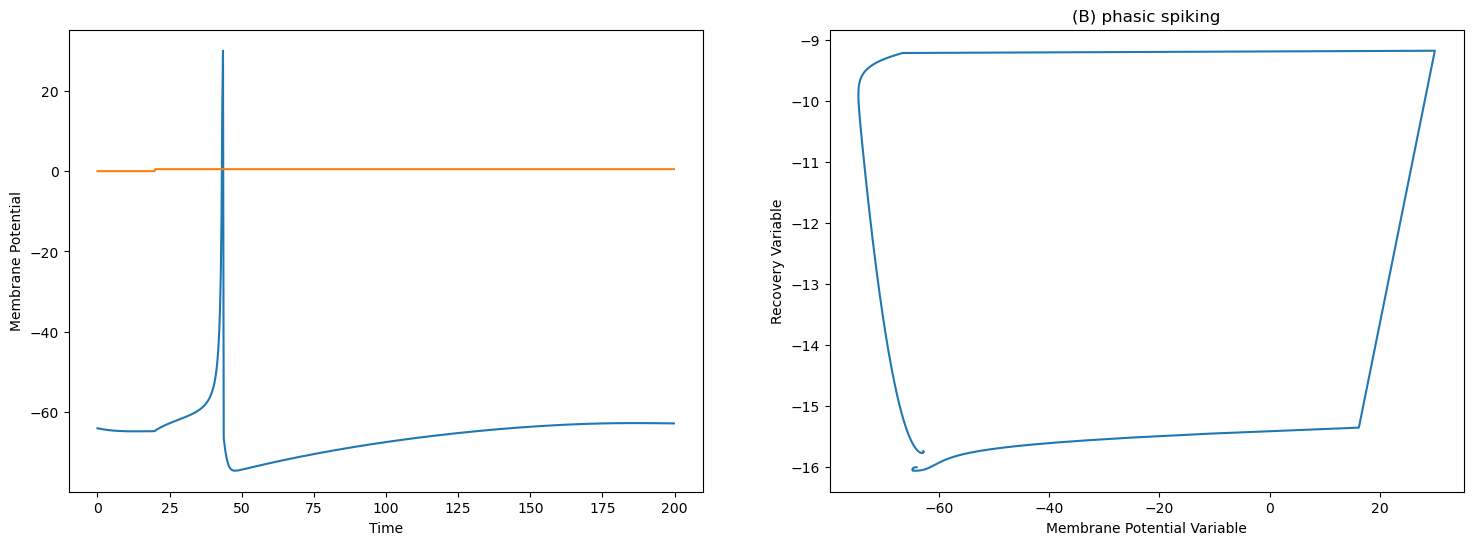

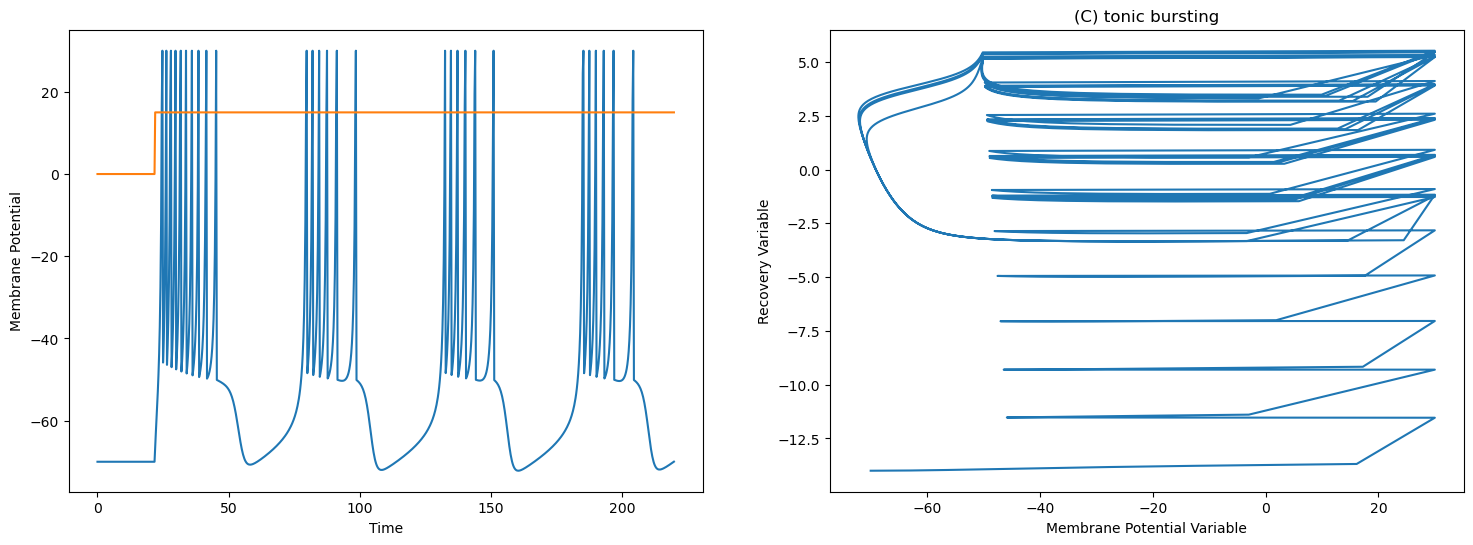

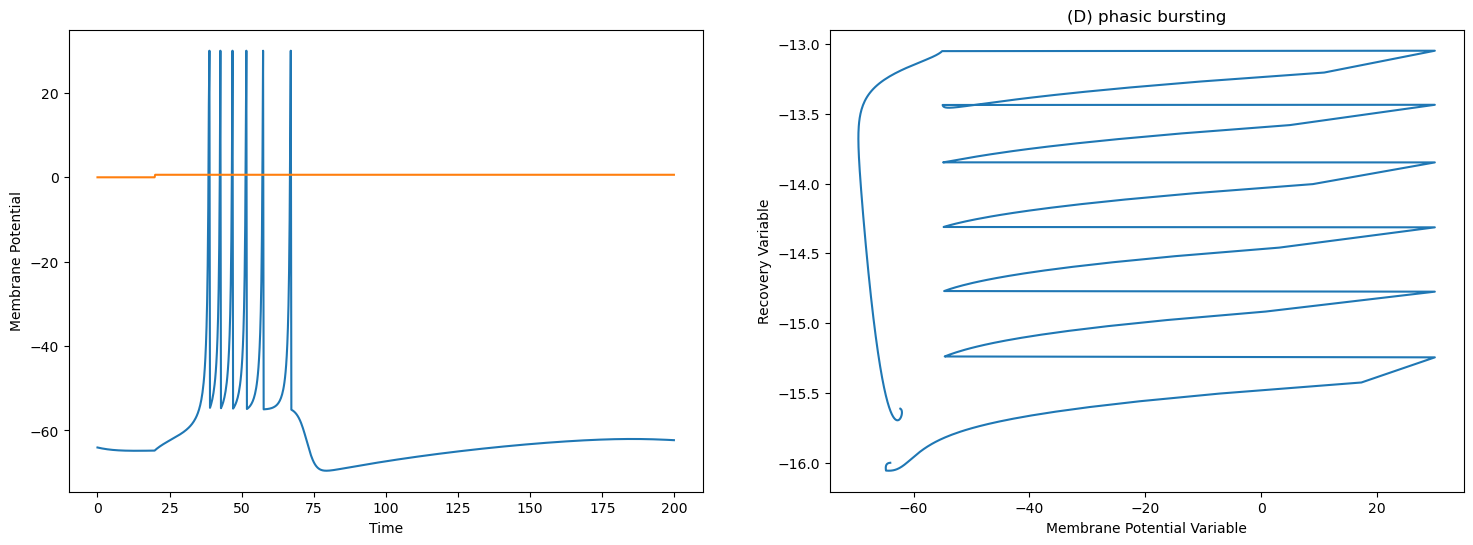

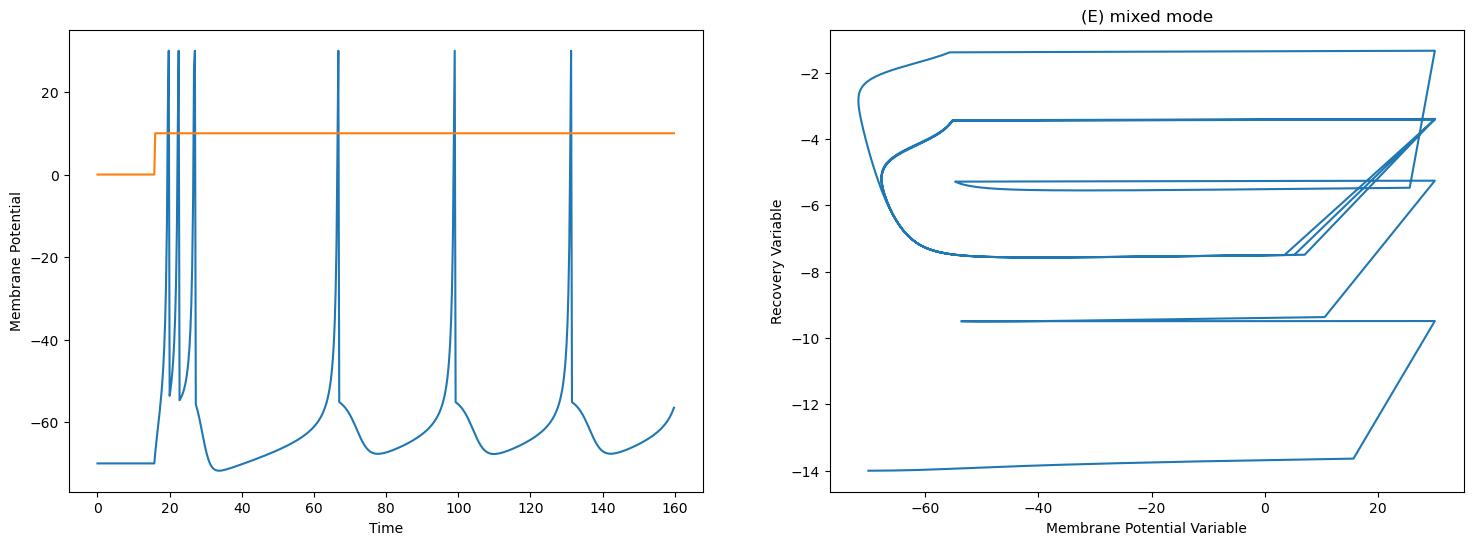

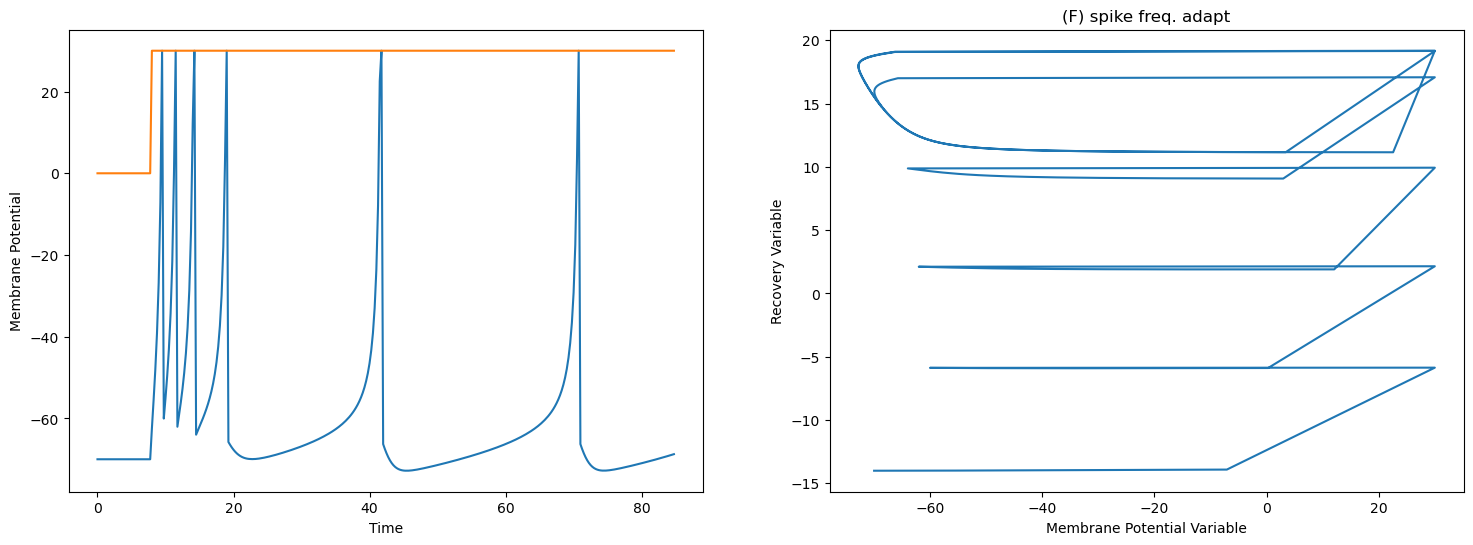

120 1200


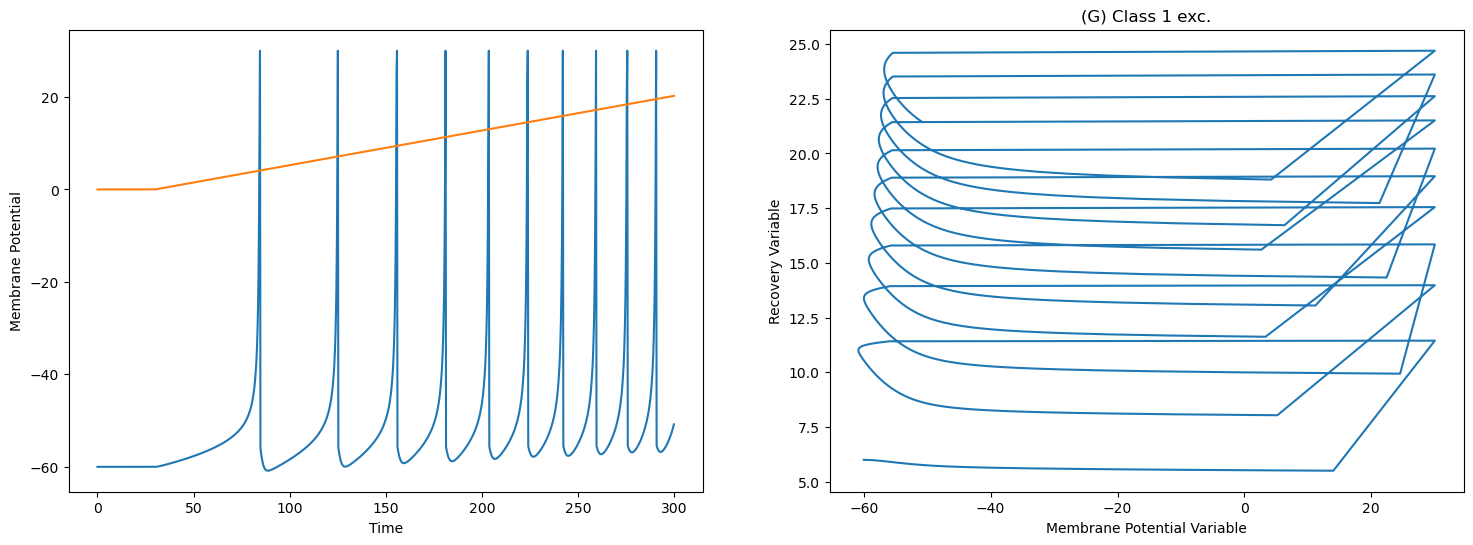

120 1200


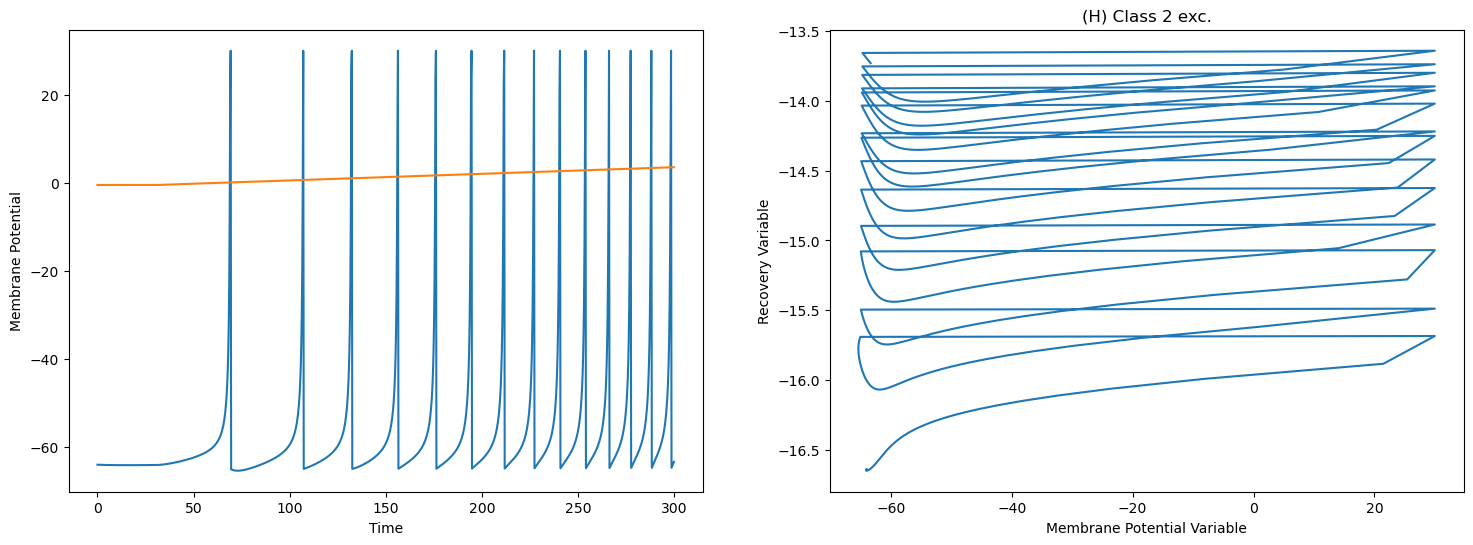

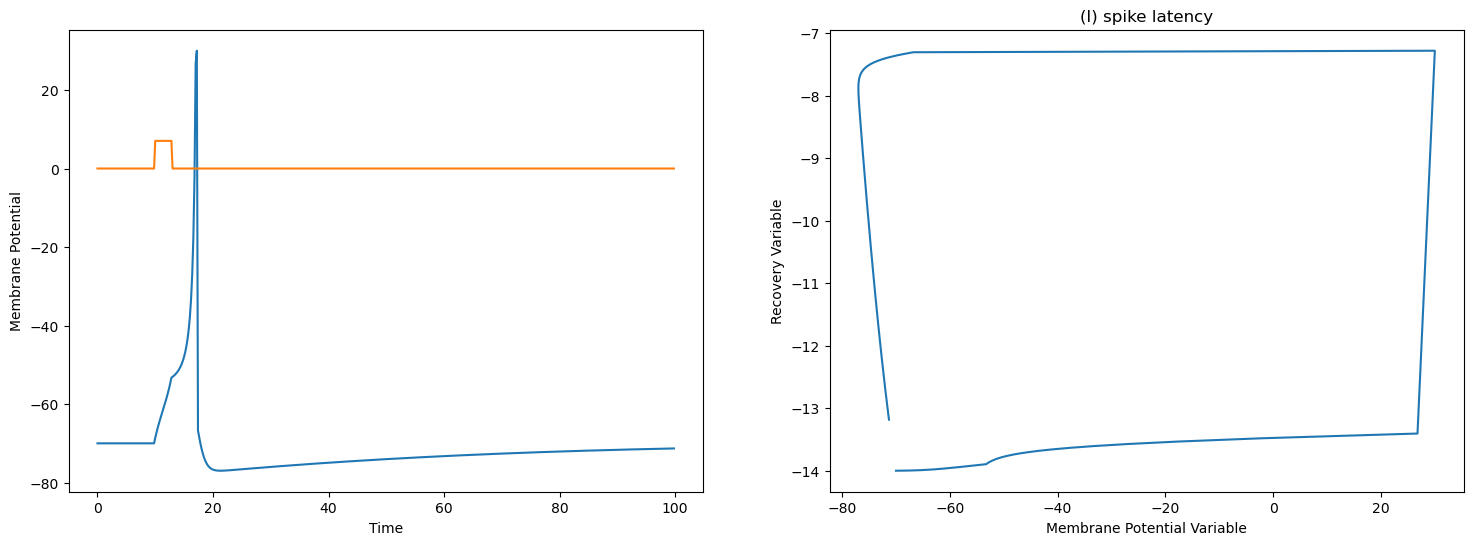

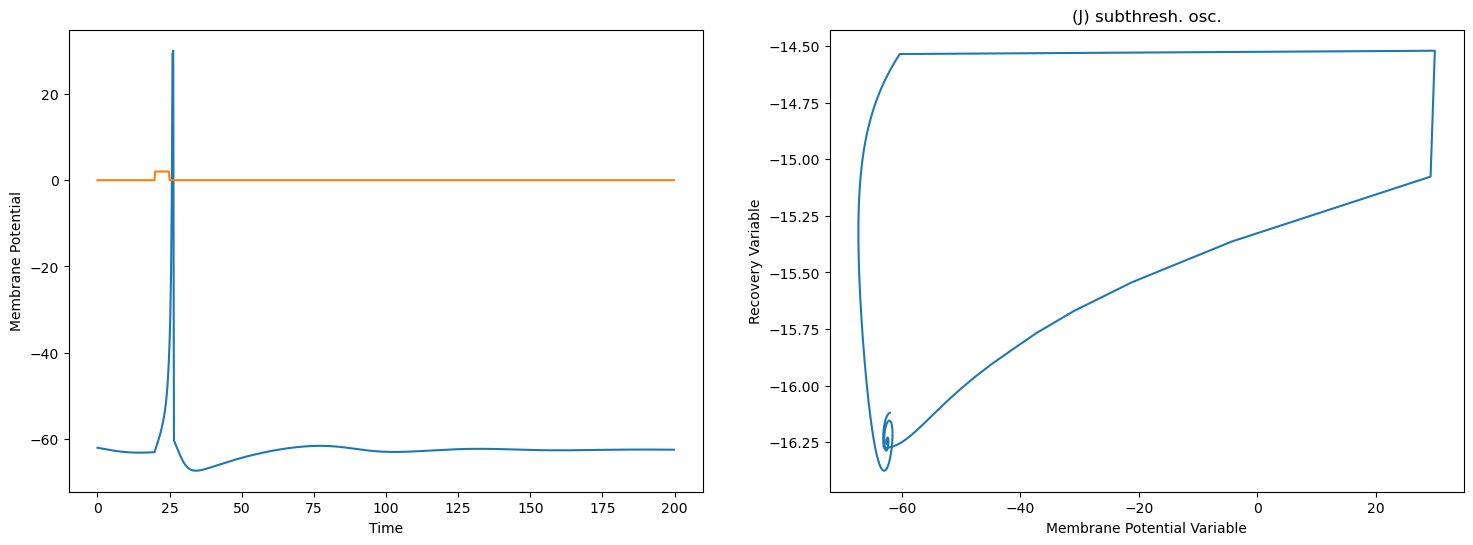

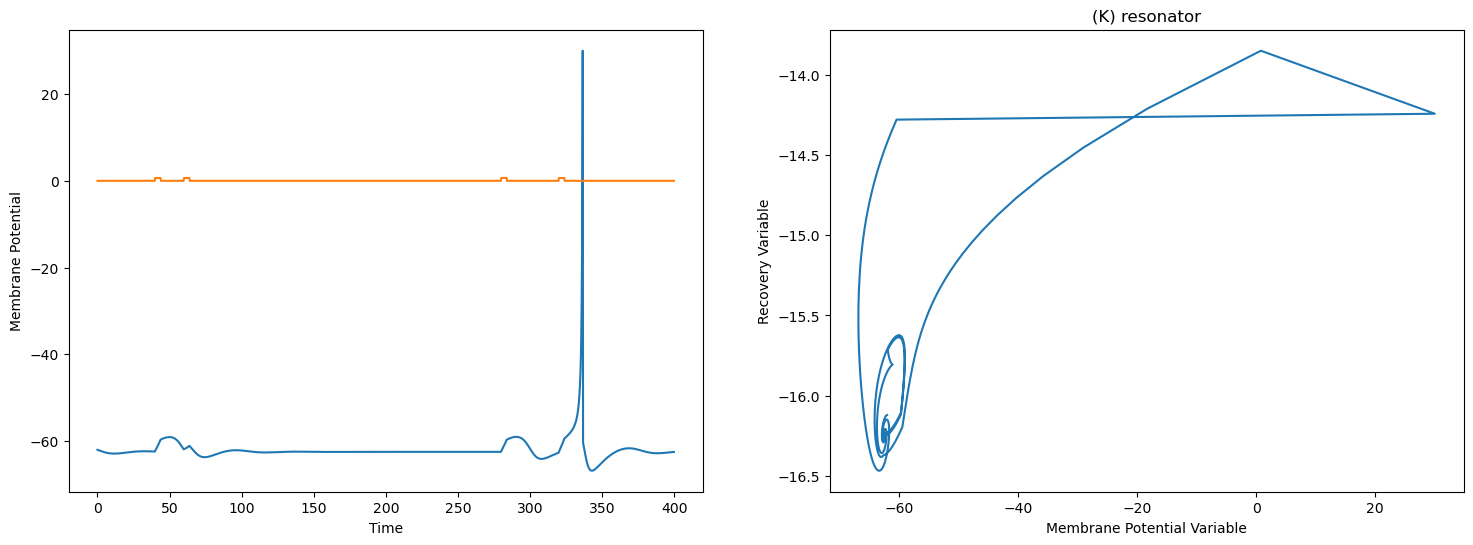

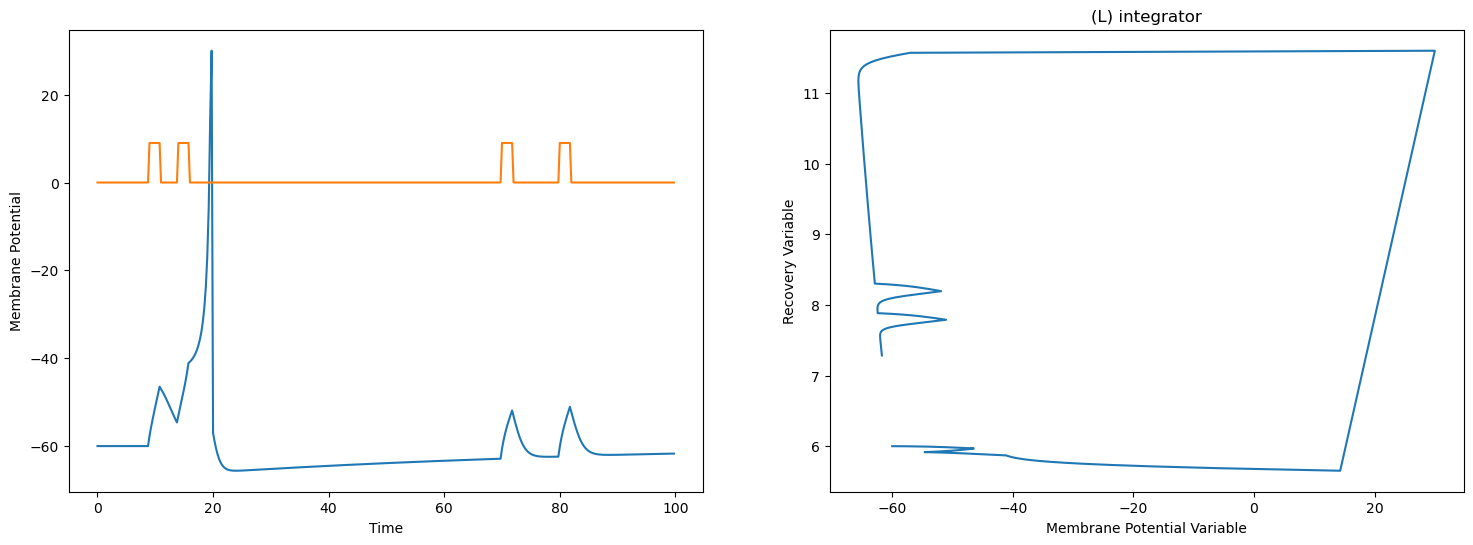

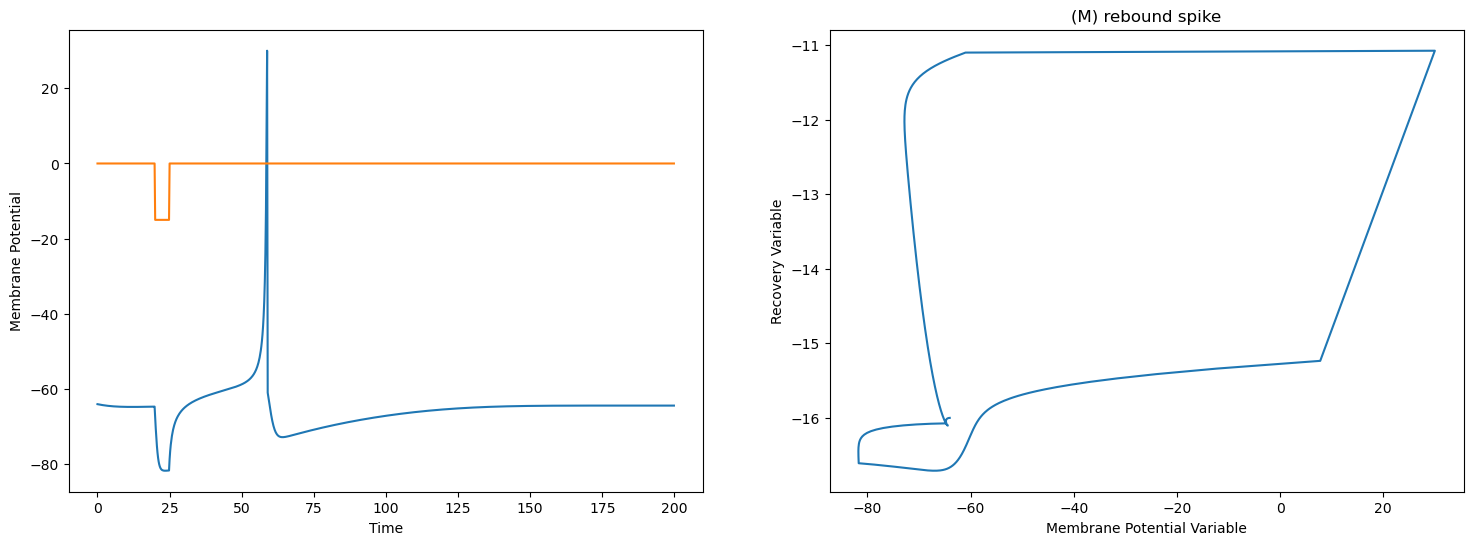

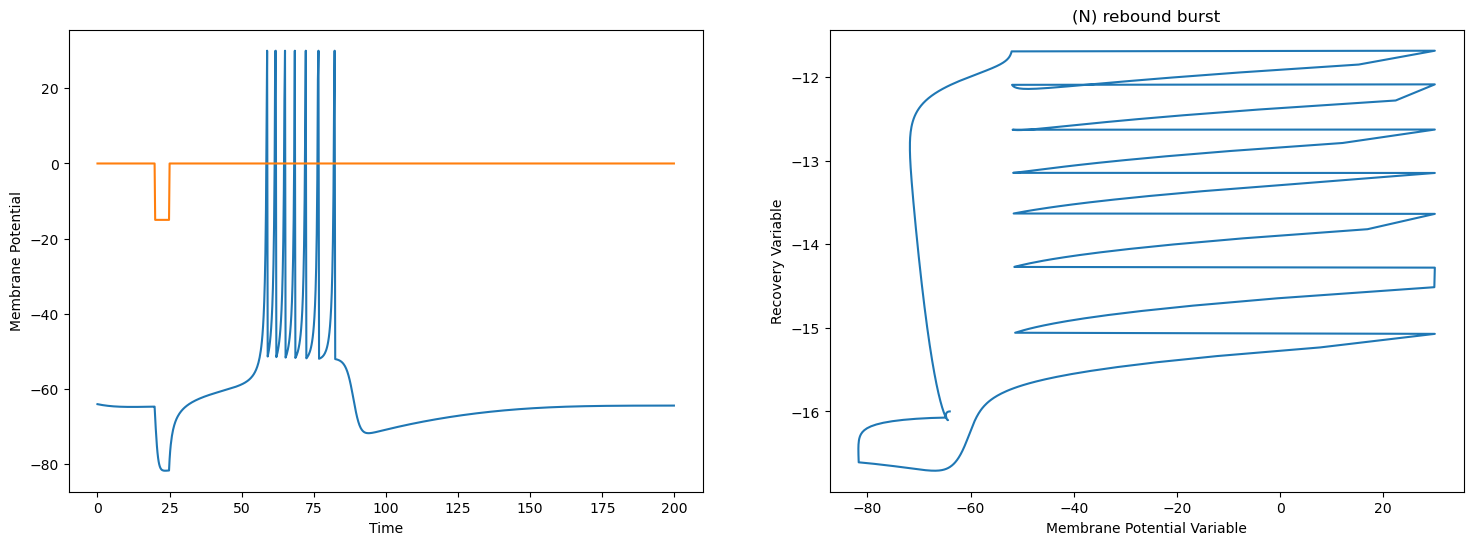

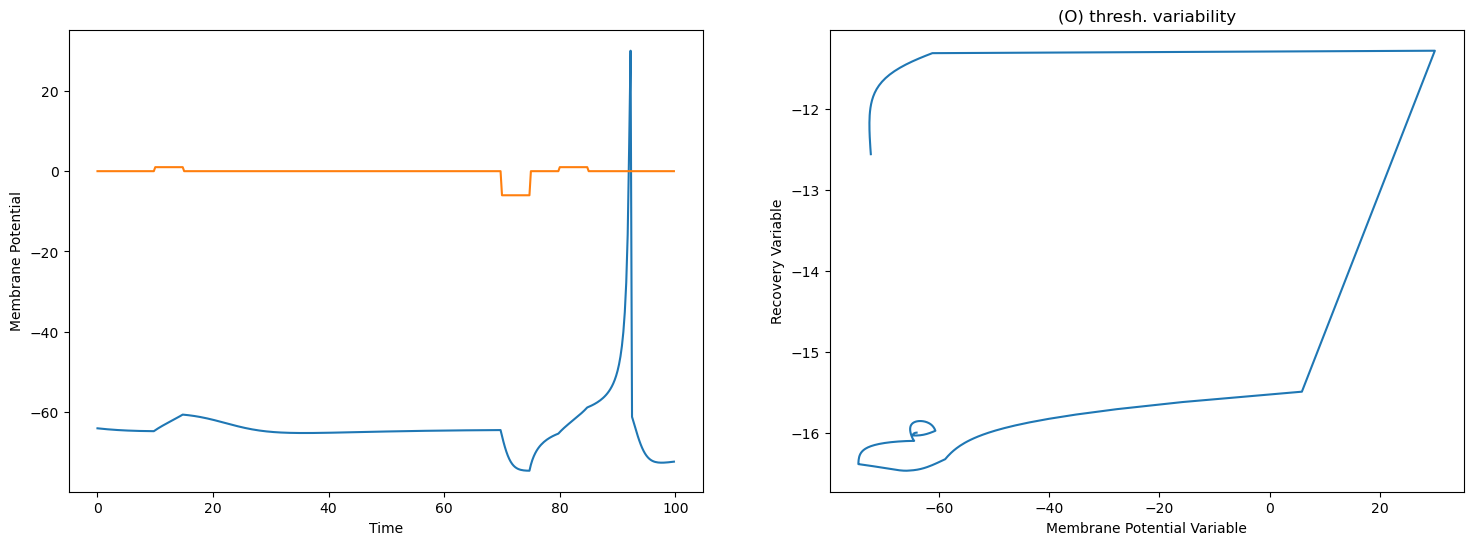

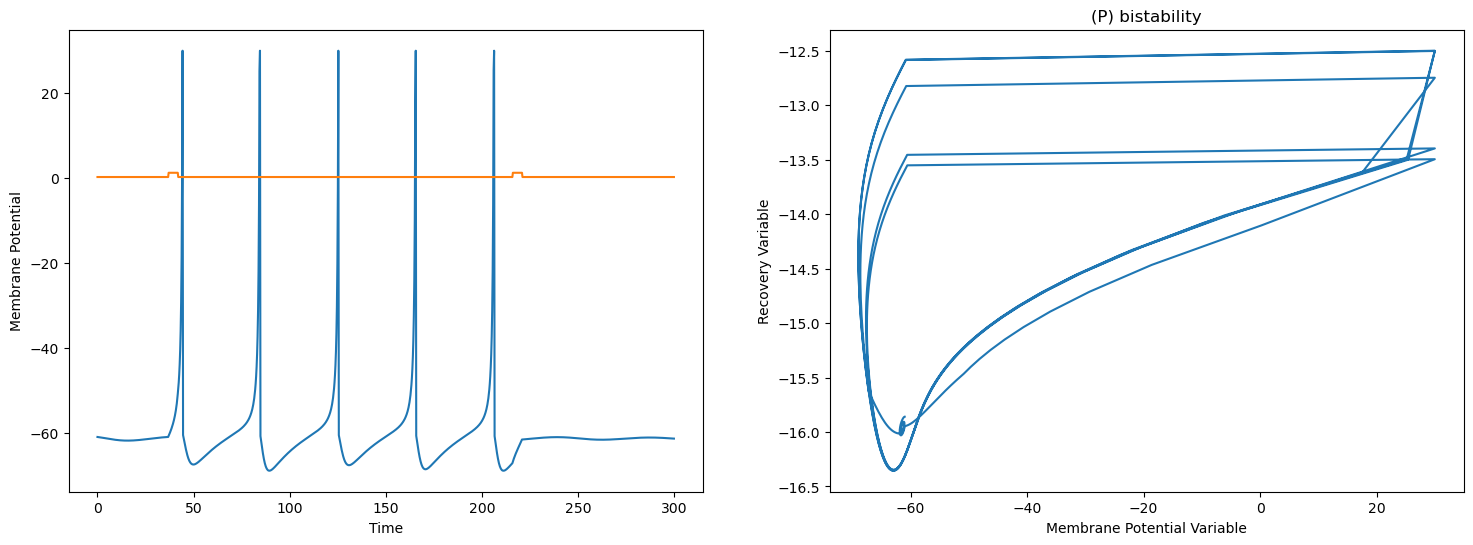

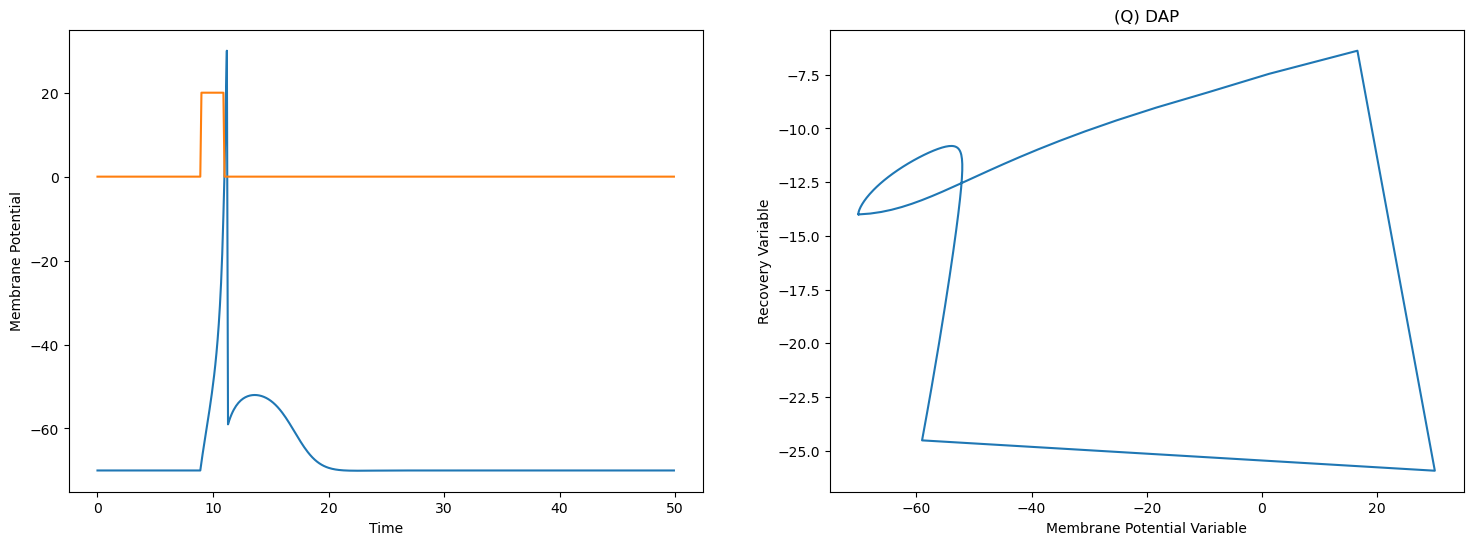

0 400
600 626


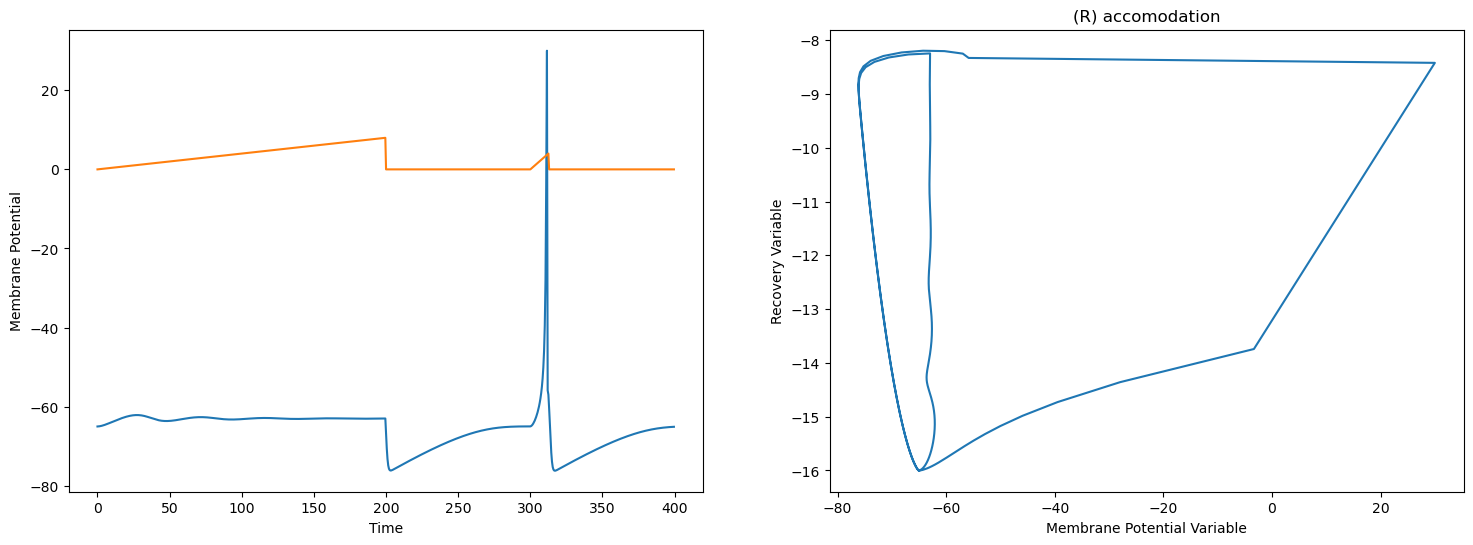

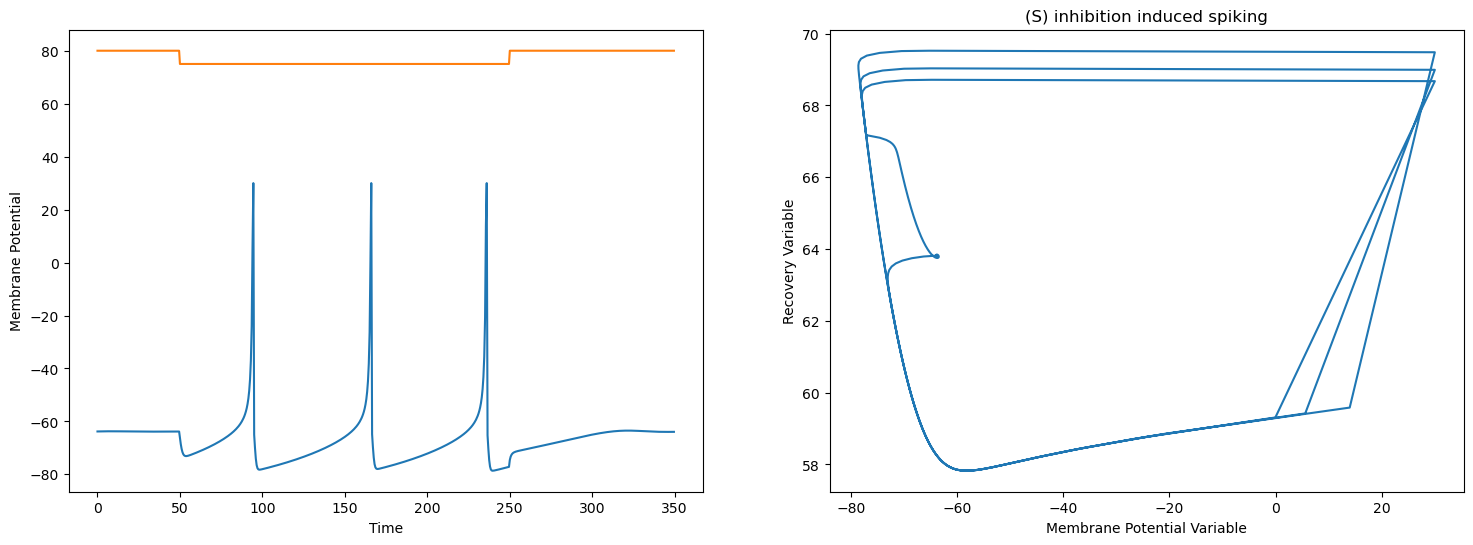

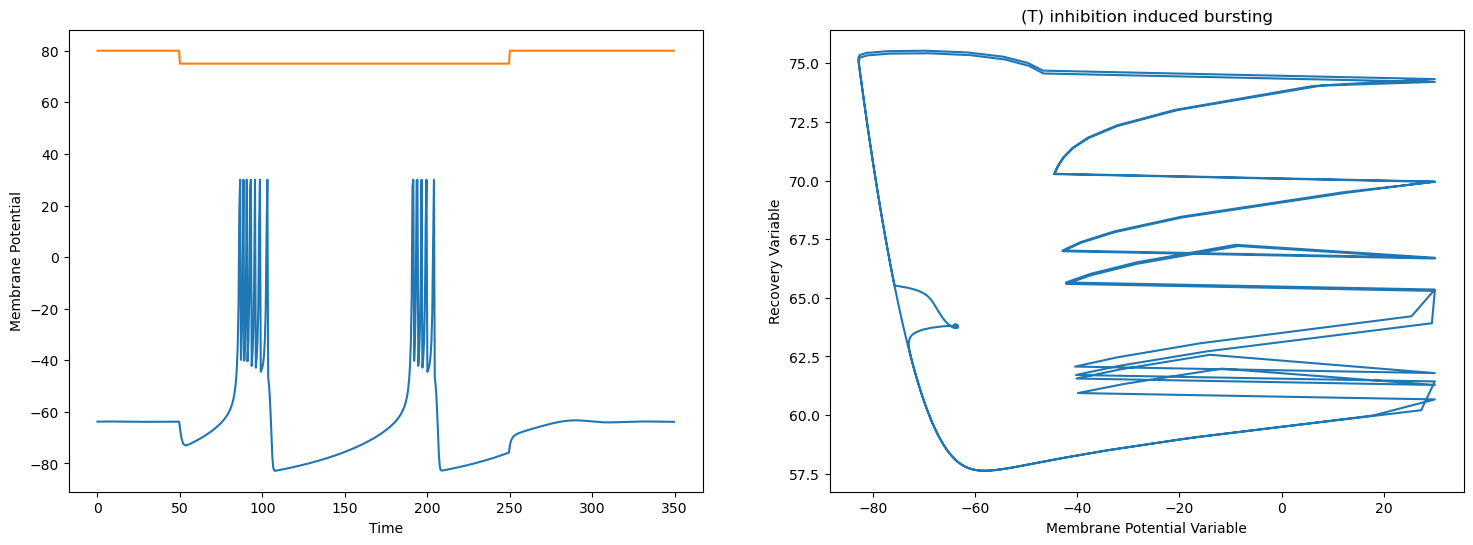

In [7]:
for i, params in enumerate(params_list):
    izhikevich_model(a=params['a'], b=params['b'], c=params['c'], d=params['d'], e=params['e'], f=params['f'], V_init=params['V_init'], 
                     u_init=params['u_init'], tau=params['tau'], name=params['name'], end_time=params['end_time'], I_intervals=I_intervals_list[i],
                     u_update_variant=params['u_update_variant'])